# Quiz 1
Read in the data in the file “Portfolios_Formed_on_ME_monthly_EW.csv” as we did in the lab sessions. We performed a series of analysis on the ‘Lo 10’ and the ‘Hi 10’ columns which are the returns of the lowest and highest decile portfolios. 
For purposes of this assignment, we will use the lowest and highest quintile portfolios, which are labelled ‘Lo 20’ and ‘Hi 20’ respectively.

In [53]:
import pandas as pd
import numpy as np
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header = 0, index_col = 0, parse_dates = True, na_values = -99.99)
returns
columns = ['Lo 20','Hi 20']
returns = returns[columns]
returns.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [54]:
returns = returns/100
returns.head()

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [55]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months)-1
return_per_month

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [57]:
#Question 1: What was the Annualized Return of the Lo 20 portfolio over the entire period?
annualized_return = (return_per_month + 1)**12 - 1
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [56]:
# Annualized Volatility
returns.std()
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [58]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.head()

,Lo 20,Hi 20
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316


In [74]:
returns.index = returns.index.to_period('M')
returns.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [75]:
prob1_5_returns = returns["1999":"2015"]
prob1_5_returns

,Lo 20,Hi 20
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2015-08,-0.0347,-0.0559
2015-09,-0.0610,-0.0333
2015-10,0.0385,0.0710
2015-11,0.0165,0.0015


In [76]:
# Returns per Month
n_months = prob1_5_returns.shape[0]
return_per_month_prob1_5 = (prob1_5_returns+1).prod()**(1/n_months)-1
return_per_month_prob1_5

Lo 20    0.009069
Hi 20    0.005094
dtype: float64

In [77]:
# Question 5: What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 
# Question 7: What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?
annualized_return_prob1_5 = (return_per_month_prob1_5 + 1)**12 - 1
annualized_return_prob1_5

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [78]:
n_months

204

In [79]:
# Question 6: What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?
# Question 8 What was the Annualized Volatility of the Hi 20 portfolio over the period 1999 - 2015 (both inclusive)? 
return_per_month_prob1_5.std()
annualized_vol = returns["1999":"2015"].std()*np.sqrt(12)
annualized_vol

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

In [80]:
import edhec_risk_kit as erk
prob1_5_returns

,Lo 20,Hi 20
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2015-08,-0.0347,-0.0559
2015-09,-0.0610,-0.0333
2015-10,0.0385,0.0710
2015-11,0.0165,0.0015


In [81]:
erk.drawdown(prob1_5_returns['Lo 20'])

,Wealth,Peaks,Drawdown
1999-01,111.140000,111.140000,0.000000
1999-02,106.705514,111.140000,-0.039900
1999-03,103.418984,111.140000,-0.069471
1999-04,111.940708,111.940708,0.000000
1999-05,116.810129,116.810129,0.000000
...,...,...,...
2015-08,669.838620,755.824511,-0.113764
2015-09,628.978464,755.824511,-0.167825
2015-10,653.194135,755.824511,-0.135786
2015-11,663.971838,755.824511,-0.121526


<AxesSubplot:>

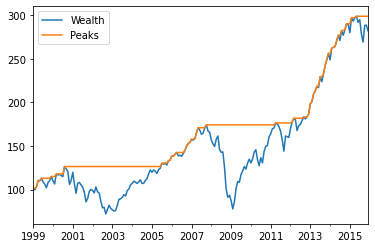

In [82]:
erk.drawdown(returns["1999":"2015"]["Hi 20"])[["Wealth", "Peaks"]].plot()

In [83]:
# Question 9: What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?
erk.drawdown(returns["1999":"2015"]["Lo 20"])["Drawdown"].min()

-0.6248092431236988

In [84]:
# Question 10: At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur? 
erk.drawdown(returns["1999":"2015"]["Lo 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [85]:
# Question 11: What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?
erk.drawdown(returns["1999":"2015"]["Hi 20"])["Drawdown"].min()

-0.5527349978713653

In [86]:
# Question 12: Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur? 
erk.drawdown(returns["1999":"2015"]["Hi 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [97]:
# Question 13: For the remaining questions, use the EDHEC Hedge Fund Indices data set that we used in the lab assignment and load them into Python. 
# Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation?     
hfi = erk.get_hfi_returns()["2009":"2015"]
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08,-0.0045,-0.0220,-0.0227,-0.0384,0.0018,-0.0249,-0.0037,-0.0131,-0.0229,-0.0056,-0.0103,0.0578,-0.0202
2015-09,-0.0063,0.0146,-0.0136,-0.0155,0.0063,-0.0276,-0.0054,-0.0052,-0.0142,-0.0097,-0.0072,0.0156,-0.0176
2015-10,0.0123,-0.0157,-0.0010,0.0313,0.0057,0.0145,-0.0014,0.0028,0.0210,0.0074,0.0109,-0.0519,0.0083


In [112]:
erk.semideviation(hfi).sort_values()*100

Fixed Income Arbitrage    0.350111
Merger Arbitrage          0.403622
Global Macro              0.473542
Equity Market Neutral     0.483072
Relative Value            0.612830
Convertible Arbitrage     0.630784
Funds Of Funds            0.754835
CTA Global                0.997609
Distressed Securities     1.002920
Event Driven              1.017526
Long/Short Equity         1.209137
Emerging Markets          1.627496
Short Selling             1.905169
dtype: float64

In [99]:
erk.semideviation(hfi).max()

0.019051685594718388

In [100]:
erk.semideviation(hfi).idxmax()

'Short Selling'

In [101]:
# Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has exhibited the lowest semideviation?   
erk.semideviation(hfi).min()

0.0035011103149572426

In [102]:
erk.semideviation(hfi).idxmin()

'Fixed Income Arbitrage'

In [105]:
# Question 15: Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has been most negatively skewed?  
erk.skewness(hfi) .sort_values()*100

Equity Market Neutral     -68.552843
Merger Arbitrage          -59.517866
Funds Of Funds            -52.254496
Event Driven              -43.601070
Long/Short Equity         -35.974630
Distressed Securities     -23.509675
Relative Value              4.962213
Emerging Markets            8.676263
CTA Global                 14.145527
Global Macro               26.269827
Short Selling              28.783570
Fixed Income Arbitrage    104.170691
Convertible Arbitrage     115.353407
dtype: float64

In [109]:
erk.skewness(hfi).idxmin()

'Equity Market Neutral'

In [110]:
# Question 16: Looking at the data since 2000 (including all of 2000) through 2018 which Hedge Fund Index has exhibited the highest kurtosis?  
erk.kurtosis(hfi).sort_values()*100

CTA Global                217.299986
Global Macro              262.645091
Merger Arbitrage          285.861528
Distressed Securities     308.875093
Short Selling             315.352901
Event Driven              327.339536
Funds Of Funds            344.723265
Long/Short Equity         361.636379
Relative Value            399.289102
Emerging Markets          424.735778
Equity Market Neutral     490.723367
Convertible Arbitrage     534.154302
Fixed Income Arbitrage    565.247438
dtype: float64

In [113]:
erk.kurtosis(hfi).idxmax()

'Fixed Income Arbitrage'